In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_data_feature_selection_NEW.csv to cleaned_data_feature_selection_NEW.csv


In [ ]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['cleaned_data_feature_selection_NEW.csv']))

In [ ]:
df

,Unnamed: 0,REGION-CENTROID-ROW,HEDGE-MEAN,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN,CLASS
0,0,125.0,0.666667,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818,1
1,1,133.0,0.500000,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817,1
2,2,139.0,0.833333,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946,1
3,3,137.0,1.111111,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272,1
4,4,111.0,0.888889,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305,2305,158.0,0.833333,7.962963,6.333334,11.888889,5.666666,-4.888889,11.777778,-6.888889,11.888889,0.520578,-1.982834,4
2306,2306,162.0,0.333333,8.370370,6.666666,12.000000,6.444445,-5.111111,10.888889,-5.777778,12.000000,0.484805,-2.044946,4
2307,2307,161.0,0.777778,7.148148,5.555555,10.888889,5.000000,-4.777778,11.222222,-6.444445,10.888889,0.540918,-1.996307,4
2308,2308,158.0,1.388889,8.444445,7.000000,12.222222,6.111111,-4.333334,11.333333,-7.000000,12.222222,0.503086,-1.943449,4


In [ ]:
# Prepare the data
from sklearn.preprocessing import LabelEncoder
X = df.iloc[:, 1:-1]
y = df['CLASS']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_sample_image
from sklearn.feature_extraction.image import extract_patches_2d

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
X_train

,REGION-CENTROID-ROW,HEDGE-MEAN,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
1566,236.0,3.333333,16.074074,13.111111,16.666668,18.444445,-8.888889,1.777778,7.111111,18.555555,0.292729,2.789800
344,173.0,9.000000,43.592594,39.555557,52.888890,38.333336,-12.111111,27.888890,-15.777778,52.888890,0.266914,-1.998857
556,34.0,0.833331,72.888885,65.000000,89.111115,64.555560,-23.666666,48.666668,-25.000000,89.111115,0.279176,-2.078154
1005,226.0,1.111111,18.000000,14.000000,15.777778,24.222221,-12.000000,-6.666666,18.666666,24.222221,0.424404,2.273030
680,138.0,0.944444,1.148148,0.111111,2.777778,0.555556,-3.111111,4.888889,-1.777778,2.777778,0.977778,-2.219242
...,...,...,...,...,...,...,...,...,...,...,...,...
1638,152.0,2.388889,26.555555,20.333334,37.666668,21.666666,-18.666666,33.333332,-14.666667,37.666668,0.463430,-2.165731
1095,173.0,3.611111,55.185184,48.555557,69.555560,47.444443,-19.888890,43.111110,-23.222221,69.555560,0.321085,-2.041720
1130,200.0,6.055555,58.592594,52.222220,72.666670,50.888890,-19.111110,42.222220,-23.111110,72.666670,0.300181,-2.028850
1294,63.0,1.944444,22.370370,20.333334,29.666666,17.111110,-6.111111,21.888890,-15.777778,29.666666,0.422651,-1.813886


In [ ]:
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9437229437229437

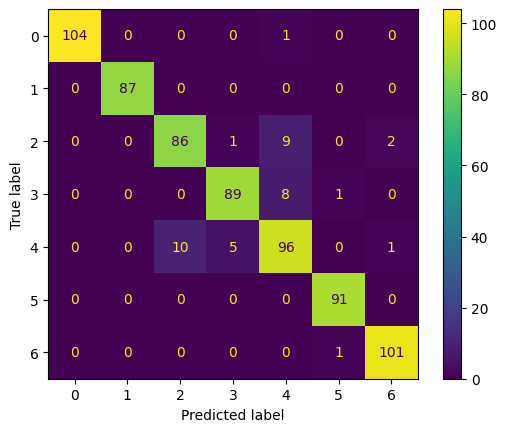

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, f1_score

# Calculate precision
precision = precision_score(y_test, y_pred, average='macro')
print(f'Precision: {precision}')

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='macro')
print(f'F1 Score: {f1}')

Precision: 0.9463470245091637
F1 Score: 0.9461947890105107
